In [1]:
import requests
import os
import sys
import pandas as pd
import numpy as np
import pyodbc

In [2]:
# MTA marketing & pipeline lenses
# ALL Channels

cnxn = pyodbc.connect(DSN="ACS",ansi=True)
df_all = pd.io.sql.read_sql_query(
    """ (SELECT YEAR(ACTIVITY_TS) AS Y, JOURNEY_ID, PROD_TYPE, ACTIVITY_TYPE, OPTY_BU, OPTY_FLAG, CHANNEL, COUNT(ACTIVITY_DATA_KEY) AS TOT_ACT
        FROM ACS_MKTA2.V_MTA_TRANSPOSED_2018
        WHERE OPTY_BU LIKE 'Security'
        AND ACTIVITY_TYPE IN ('VISIT', 'INTERACTION')
        AND OPTY_FLAG = 1
        GROUP BY Y, JOURNEY_ID, PROD_TYPE, ACTIVITY_TYPE, OPTY_BU, OPTY_FLAG, CHANNEL
        ORDER BY TOT_ACT DESC)

        union all

        (SELECT YEAR(ACTIVITY_TS) AS Y, JOURNEY_ID, PROD_TYPE, ACTIVITY_TYPE, OPTY_BU, OPTY_FLAG, CHANNEL, COUNT(ACTIVITY_DATA_KEY) AS TOT_ACT
        FROM ACS_MKTA2.V_MTA_TRANSPOSED_2018
        WHERE PLAN LIKE 'Security'
        AND ACTIVITY_TYPE IN ('VISIT', 'INTERACTION')
        AND OPTY_FLAG = 0
        GROUP BY Y, JOURNEY_ID, PROD_TYPE, ACTIVITY_TYPE, OPTY_BU, OPTY_FLAG, CHANNEL
        ORDER BY TOT_ACT DESC); """, con=cnxn)
cnxn.close()
df_all.head(5)

,Y,JOURNEY_ID,PROD_TYPE,ACTIVITY_TYPE,OPTY_BU,OPTY_FLAG,CHANNEL,TOT_ACT
0,2017,699316,SaaS,INTERACTION,Security,1.0,Organic,1
1,2017,699316,SaaS,INTERACTION,Security,1.0,Email,33
2,2017,699316,SaaS,VISIT,Security,1.0,Organic,12
3,2017,1117403,SaaS,INTERACTION,Security,1.0,Email,2
4,2018,1117403,SaaS,INTERACTION,Security,1.0,Email,11


In [3]:
# MTA marketing & pipeline lenses
# ALL Channels

from scipy.stats import ttest_ind

all1 = df_all[df_all['OPTY_FLAG']==1.0]
all2 = df_all[df_all['OPTY_FLAG']==0.0]
ttest_ind(all1['TOT_ACT'], all2['TOT_ACT'])

Ttest_indResult(statistic=17.7991787139495, pvalue=7.42776589397942e-71)

In [4]:
# Content Syndication channel ONLY

import pandasql as ps

df_cs = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Content Syndication" 
        AND Y = 2018
        
        GROUP BY
            JOURNEY_ID,
            CHANNEL,
            OPTY_FLAG; """

df_cs_test = (ps.sqldf(df_cs, locals()))
#df_cs_test.head(5)

cs1 = df_cs_test[df_cs_test['OPTY_FLAG']==1.0]
cs2 = df_cs_test[df_cs_test['OPTY_FLAG']==0.0]
ttest_ind(cs1['AVG_ACT'], cs2['AVG_ACT'])

Ttest_indResult(statistic=52.06436836532948, pvalue=0.0)

In [5]:
# Paid Social channel ONLY

df_ps = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Paid Social" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_ps_test = (ps.sqldf(df_ps, locals()))
#df_ps_test.head(5)

ps1 = df_ps_test[df_ps_test['OPTY_FLAG']==1.0]
ps2 = df_ps_test[df_ps_test['OPTY_FLAG']==0.0]
ttest_ind(ps1['AVG_ACT'], ps2['AVG_ACT'])

Ttest_indResult(statistic=3.240706631615211, pvalue=0.001197158570561817)

In [6]:
# Paid Search channel ONLY 

df_s = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Paid Search" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_s_test = (ps.sqldf(df_s, locals()))
#df_s_test.head(5)

s1 = df_s_test[df_s_test['OPTY_FLAG']==1.0]
s2 = df_s_test[df_s_test['OPTY_FLAG']==0.0]
ttest_ind(s1['AVG_ACT'], s2['AVG_ACT'])

Ttest_indResult(statistic=7.477668312718343, pvalue=7.793128996688991e-14)

In [7]:
# Display channel ONLY

df_d = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Display" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_d_test = (ps.sqldf(df_d, locals()))
#df_d_test.head(5)

d1 = df_d_test[df_d_test['OPTY_FLAG']==1.0]
d2 = df_d_test[df_d_test['OPTY_FLAG']==0.0]
ttest_ind(d1['AVG_ACT'], d2['AVG_ACT'])

Ttest_indResult(statistic=3.30152831309913, pvalue=0.0009740820063437445)

In [8]:
# Email channel ONLY

df_e = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Email" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_e_test = (ps.sqldf(df_e, locals()))
#df_e_test.head(5)

e1 = df_e_test[df_e_test['OPTY_FLAG']==1.0]
e2 = df_e_test[df_e_test['OPTY_FLAG']==0.0]
ttest_ind(e1['AVG_ACT'], e2['AVG_ACT'])

Ttest_indResult(statistic=38.05155144698619, pvalue=0.0)

In [9]:
# Digital Other channel ONLY

df_do = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Digital Other" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_do_test = (ps.sqldf(df_do, locals()))
#df_do_test.head(5)

do1 = df_do_test[df_do_test['OPTY_FLAG']==1.0]
do2 = df_do_test[df_do_test['OPTY_FLAG']==0.0]
ttest_ind(do1['AVG_ACT'], do2['AVG_ACT'])

Ttest_indResult(statistic=10.69139867980622, pvalue=6.57564677420161e-26)

In [10]:
# F2F Event channel ONLY

df_f2f = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "F2F Event" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_f2f_test = (ps.sqldf(df_f2f, locals()))
#df_f2f_test.head(5)

f2f1 = df_f2f_test[df_f2f_test['OPTY_FLAG']==1.0]
f2f2 = df_f2f_test[df_f2f_test['OPTY_FLAG']==0.0]
ttest_ind(f2f1['AVG_ACT'], f2f2['AVG_ACT'])

Ttest_indResult(statistic=26.255763560593792, pvalue=7.382075570971785e-150)

In [11]:
# Organic Event channel ONLY

df_o = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Organic" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_o_test = (ps.sqldf(df_o, locals()))
#df_o_test.head(5)

o1 = df_o_test[df_o_test['OPTY_FLAG']==1.0]
o2 = df_o_test[df_o_test['OPTY_FLAG']==0.0]
ttest_ind(o1['AVG_ACT'], o2['AVG_ACT'])

Ttest_indResult(statistic=8.895177324850494, pvalue=5.930903760447581e-19)

In [12]:
# Webcast channel ONLY

df_w = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE CHANNEL = "Webcast" 
        AND Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_w_test = (ps.sqldf(df_w, locals()))
#df_w_test.head(5)

w1 = df_w_test[df_w_test['OPTY_FLAG']==1.0]
w2 = df_w_test[df_w_test['OPTY_FLAG']==0.0]
ttest_ind(w1['AVG_ACT'], w2['AVG_ACT'])

Ttest_indResult(statistic=16.779656175180637, pvalue=1.3379490421818566e-62)

In [13]:
df_t = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        OPTY_FLAG,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df_all

        WHERE Y = 2018
        
        GROUP BY 
            JOURNEY_ID,
            CHANNEL, 
            OPTY_FLAG; """

df_tukey = (ps.sqldf(df_t, locals()))
df_tukey.head(5)

,JOURNEY_ID,CHANNEL,OPTY_FLAG,AVG_ACT
0,12,Email,0.0,3.0
1,20,Email,0.0,2.0
2,22,Email,0.0,3.0
3,28,Email,0.0,10.0
4,33,Email,0.0,6.0


group1,group2,meandiff,lower,upper,reject
Content Syndication,Digital Other,-0.5559,-37.1897,36.0779,False
Content Syndication,Display,-0.3158,-30.4848,29.8531,False
Content Syndication,Email,9.4434,1.1755,17.7113,True
Content Syndication,F2F Event,0.1963,-11.9929,12.3854,False
Content Syndication,Organic,19.4432,10.6257,28.2607,True
Content Syndication,Paid Search,-0.3071,-12.0862,11.472,False
Content Syndication,Paid Social,-0.5727,-19.016,17.8706,False
Content Syndication,Pre-Event Registration,6.2537,-8.7026,21.21,False
Content Syndication,Webcast,-0.5258,-15.1394,14.0878,False
Digital Other,Display,0.2401,-46.0748,46.555,False


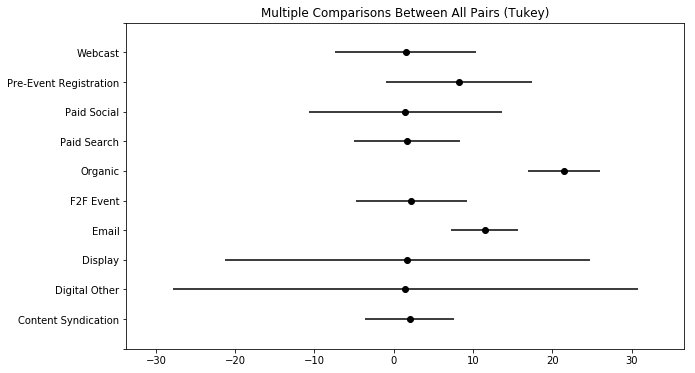

In [15]:
# MTA marketing & pipeline lenses

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#mc = MultiComparison(df['AVG_ACT_ATTR'], df['CHANNEL'])
#result = mc.tukeyhsd()
 
#print(result)
#print(mc.groupsunique)


tukey = pairwise_tukeyhsd(endog=df_tukey['AVG_ACT'],     # Data
                          groups=df_tukey['CHANNEL'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [38]:
# MTA marketing to pipeline lens

cnxn = pyodbc.connect(DSN="ACS",ansi=True)
df2 = pd.io.sql.read_sql_query(
    """ SELECT YEAR(ACTIVITY_TS) AS Y, JOURNEY_ID, PLAN, OPTY_FLAG, OPTY_BU, CHANNEL, COUNT(ACTIVITY_DATA_KEY) AS TOT_ACT
        FROM ACS_MKTA2.V_MTA_TRANSPOSED_2018
        WHERE OPTY_BU LIKE 'Security'
        AND PLAN = 'Security'
        AND ACTIVITY_TYPE in ('VISIT', 'INTERACTION')
        AND OPTY_FLAG = 1
        GROUP BY Y, JOURNEY_ID, PLAN, OPTY_FLAG, OPTY_BU, CHANNEL
        ORDER BY TOT_ACT DESC; """, con=cnxn)
cnxn.close()
df2.head(5)

,Y,JOURNEY_ID,PLAN,OPTY_FLAG,OPTY_BU,CHANNEL,TOT_ACT
0,2018,1985997,Security,1.0,Security,Email,3060
1,2017,2840791,Security,1.0,Security,Email,2470
2,2018,3010648,Security,1.0,Security,Email,1140
3,2017,2604556,Security,1.0,Security,Email,830
4,2017,2604559,Security,1.0,Security,Email,830


In [39]:
df_t2 = """
    
    SELECT 
        JOURNEY_ID,
        CHANNEL,
        AVG(TOT_ACT) AS AVG_ACT
       
        FROM df2

        WHERE Y = 2018
        
        GROUP BY
            
            JOURNEY_ID, 
            CHANNEL; """

df_tukey2 = (ps.sqldf(df_t2, locals()))
df_tukey2.head(5)

,JOURNEY_ID,CHANNEL,AVG_ACT
0,131,Content Syndication,1.0
1,2443,Email,5.0
2,56205,Email,9.0
3,56205,Organic,1.0
4,61186,Content Syndication,2.0


group1,group2,meandiff,lower,upper,reject
Content Syndication,Digital Other,-0.3983,-14.4094,13.6128,False
Content Syndication,Display,-0.1425,-12.453,12.1679,False
Content Syndication,Email,9.3007,7.5777,11.0236,True
Content Syndication,F2F Event,0.2082,-2.5046,2.921,False
Content Syndication,Organic,0.7616,-1.2602,2.7833,False
Content Syndication,Paid Search,0.4998,-2.2908,3.2903,False
Content Syndication,Paid Social,0.1868,-5.7352,6.1088,False
Content Syndication,Pre-Event Registration,5.4603,1.9725,8.9482,True
Content Syndication,Webcast,-0.2676,-3.3145,2.7793,False
Digital Other,Display,0.2558,-18.2698,18.7813,False


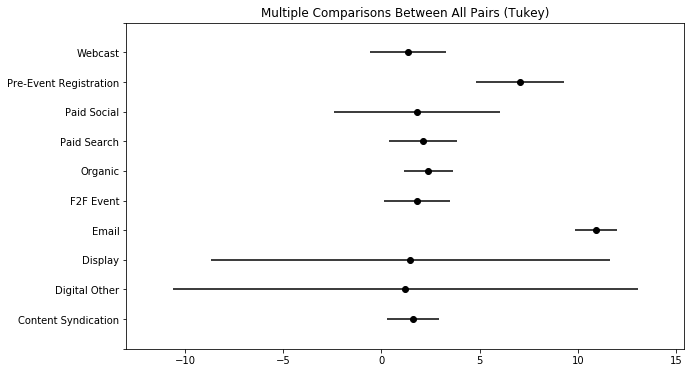

In [40]:
# MTA marketing to pipeline lens

tukey2 = pairwise_tukeyhsd(endog=df_tukey2['AVG_ACT'],     # Data
                          groups=df_tukey2['CHANNEL'],   # Groups
                          alpha=0.05)          # Significance level

tukey2.plot_simultaneous()    # Plot group confidence intervals

tukey2.summary()              # See test summary

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

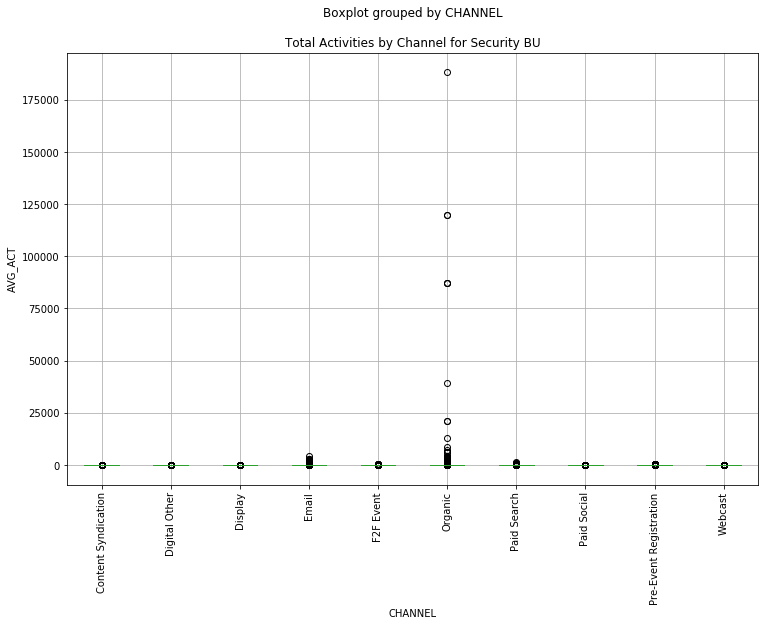

In [28]:
# MTA marketing to pipeline lens

#Create a boxplot
df_tukey.boxplot('AVG_ACT', by='CHANNEL', figsize=(12, 8))
plt.title("Total Activities by Channel for Security BU")
plt.ylabel("AVG_ACT")
plt.xticks(rotation = 90)